#### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

The company is looking at prospective properties to buy to enter the market. We need to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal
We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_validate
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

### Basic Data Exploration and Understanding

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.shape

(1460, 81)

In [5]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

##### The above analysis shows there are 38 numeric columns out of total of 81 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### The above information shows presence of too many null values in the attributes like Alley,PoolQC,FireplaceQu,Fence,MiscFeature. 

### Checking for Null and missing values, and handling them

In [7]:
null_list=['Alley','PoolQC','FireplaceQu','Fence','MiscFeature']
for i in null_list:
    print (round(data[i].isnull().sum()/len(data),2))


0.94
1.0
0.47
0.81
0.96


Since the above columns have NUll values more than 20%, we can drop them from dataset

In [8]:
data=data.drop(null_list,axis=1)

In [9]:
data.shape

(1460, 76)

There are other columns with NULL values. Lets Analyse those columns for the percentage of null values and decide on null value treatment

In [10]:
null_list2=['LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']
for i in null_list2:
    print (round(data[i].isnull().sum()/len(data),2))

0.18
0.01
0.01
0.03
0.03
0.03
0.03
0.03
0.0
0.06
0.06
0.06
0.06
0.06


In [11]:
data['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [12]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [13]:
data['LotFrontage'].isnull().sum()

259

In [14]:
num=data['LotFrontage'].mean()
num

70.04995836802665

In [15]:
data['LotFrontage'].fillna(num,inplace=True)

In [16]:
data.MasVnrType.describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [17]:
data.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [18]:
data.MasVnrType.fillna(method='ffill',inplace=True)

In [19]:
data.MasVnrType.isnull().sum()

0

##### Removed all NULL values from dataset

In [20]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    22.024023    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    60.000000    7553.500000     5.000000   
50%     730.500000    50.000000    70.049958    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [22]:
# Fetching only categorical columns to understand distinct values
cat_cols=data.select_dtypes("object")

In [23]:
cat_cols.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [24]:
for i in cat_cols:
    print(data[i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

#### From above observations there are many columns biased towards a single distinct value. Snce they will not be of much significance we can drop those attributes

In [25]:
data.drop(['Street','Utilities','LotConfig','LandSlope','RoofMatl','Heating','BsmtFinType2','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition','Condition1','Condition2','BldgType'],axis=1)

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0        1          60       RL         65.0     8450      Reg         Lvl   
1        2          20       RL         80.0     9600      Reg         Lvl   
2        3          60       RL         68.0    11250      IR1         Lvl   
3        4          70       RL         60.0     9550      IR1         Lvl   
4        5          60       RL         84.0    14260      IR1         Lvl   
...    ...         ...      ...          ...      ...      ...         ...   
1455  1456          60       RL         62.0     7917      Reg         Lvl   
1456  1457          20       RL         85.0    13175      Reg         Lvl   
1457  1458          70       RL         66.0     9042      Reg         Lvl   
1458  1459          20       RL         68.0     9717      Reg         Lvl   
1459  1460          20       RL         75.0     9937      Reg         Lvl   

     Neighborhood HouseStyle  OverallQual  ...  WoodDeckSF  OpenPorchSF  \
0         CollgCr     2Story            7  ...           0           61   
1         Veenker     1Story            6  ...         298            0   
2         CollgCr     2Story            7  ...           0           42   
3         Crawfor     2Story            7  ...           0           35   
4         NoRidge     2Story            8  ...         192           84   
...           ...        ...          ...  ...         ...          ...   
1455      Gilbert     2Story            6  ...           0           40   
1456       NWAmes     1Story            6  ...         349            0   
1457      Crawfor     2Story            7  ...           0           60   
1458        NAmes     1Story            5  ...         366            0   
1459      Edwards     1Story            5  ...         736           68   

      EnclosedPorch 3SsnPorch ScreenPorch PoolArea MiscVal  MoSold YrSold  \
0                 0         0           0        0       0       2   2008   
1                 0         0           0        0       0       5   2007   
2                 0         0           0        0       0       9   2008   
3               272         0           0        0       0       2   2006   
4                 0         0           0        0       0      12   2008   
...             ...       ...         ...      ...     ...     ...    ...   
1455              0         0           0        0       0       8   2007   
1456              0         0           0        0       0       2   2010   
1457              0         0           0        0    2500       5   2010   
1458            112         0           0        0       0       4   2010   
1459              0         0           0        0       0       6   2008   

     SalePrice  
0       208500  
1       181500  
2       223500  
3       140000  
4       250000  
...        ...  
1455    175000  
1456    210000  
1457    266500  
1458    142125  
1459    147500  

[1460 rows x 58 columns]

In [26]:
cat_cols=data.select_dtypes("object")

In [27]:
cat_cols

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
0         CollgCr       Norm       Norm  ...      SBrkr          Gd   
1         Veenker      Feedr       Norm  ...      SBrkr          TA   
2         CollgCr       Norm       Norm  ...      SBrkr          Gd   
3         Crawfor       Norm       Norm  ...      SBrkr          Gd   
4         NoRidge       Norm       Norm  ...      SBrkr          Gd   
...           ...        ...        ...  ...        ...         ...   
1455      Gilbert       Norm       Norm  ...      SBrkr          TA   
1456       NWAmes       Norm       Norm  ...      SBrkr          TA   
1457      Crawfor       Norm       Norm  ...      SBrkr          Gd   
1458        NAmes       Norm       Norm  ...      FuseA          Gd   
1459      Edwards       Norm       Norm  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0           Typ     Attchd          RFn         TA         TA          Y   
1           Typ     Attchd          RFn         TA         TA          Y   
2           Typ     Attchd          RFn         TA         TA          Y   
3           Typ     Detchd          Unf         TA         TA          Y   
4           Typ     Attchd          RFn         TA         TA          Y   
...         ...        ...          ...        ...        ...        ...   
1455        Typ     Attchd          RFn         TA         TA          Y   
1456       Min1     Attchd          Unf         TA         TA          Y   
1457        Typ     Attchd          RFn         TA         TA          Y   
1458        Typ     Attchd          Unf         TA         TA          Y   
1459        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[1460 rows x 38 columns]

#### Treating all Garage values for missing values

In [28]:
Garage_cols=data[['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']]

In [29]:
for i in Garage_cols:
    data[i].fillna(method='ffill',inplace=True)

In [30]:
data.GarageYrBlt.isnull().sum()

0

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### Treating all Basement values for missing values. 

In [32]:
BM_cols=data[['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2']]

In [33]:
data.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [34]:
for i in BM_cols:
    data[i].fillna(method='ffill',inplace=True)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [36]:
data.GarageCond.isnull().sum()

0

In [37]:
data.MasVnrType.fillna(data['MasVnrType'].mode(),inplace=True)

In [38]:
data.MasVnrArea.fillna(data['MasVnrArea'].mode()[0],inplace=True)

In [39]:
data.Electrical.fillna(method='ffill',inplace=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Now all the missing values have been treated for futher analysis

### EDA and Visualisation

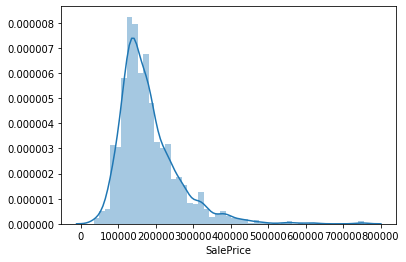

In [41]:
# Understanding the target variable to begin with
plt.figure()
sns.distplot(data['SalePrice'])

In [42]:
num_cols=data.select_dtypes('int64','float64')
cat_cols=data.select_dtypes('object')
num_cols.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

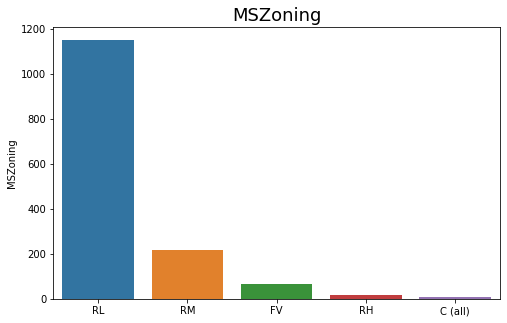

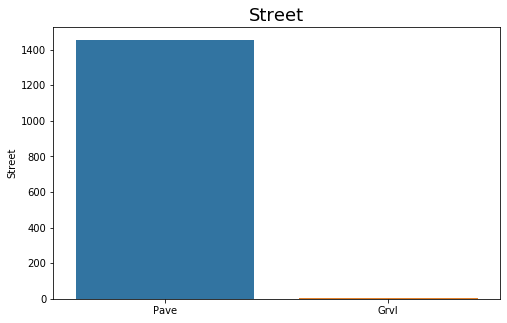

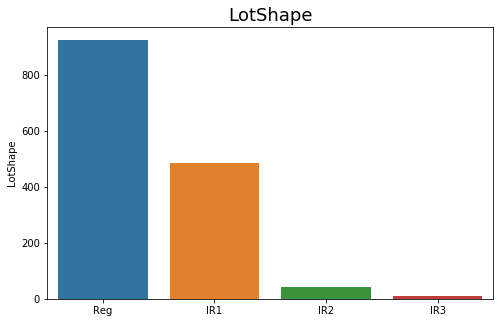

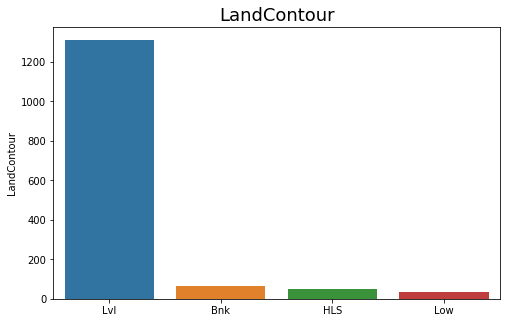

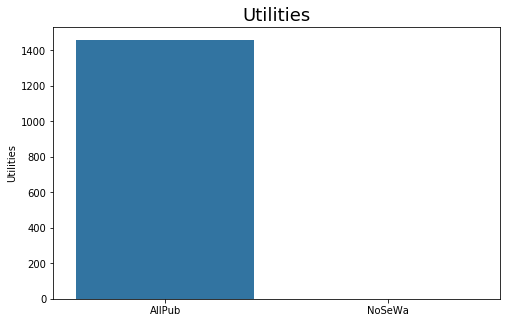

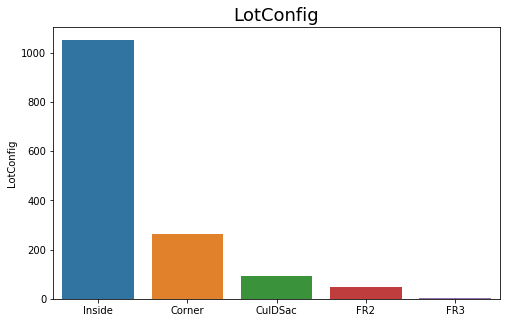

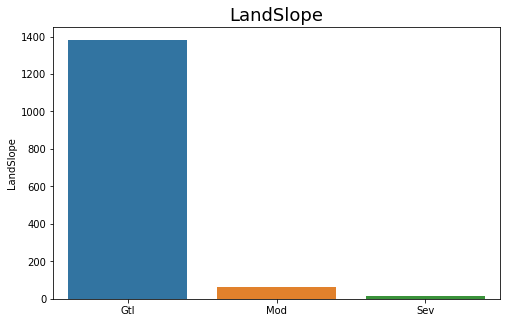

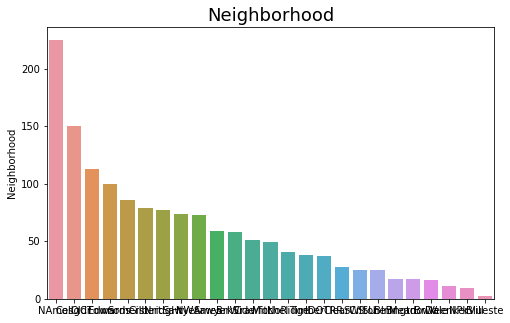

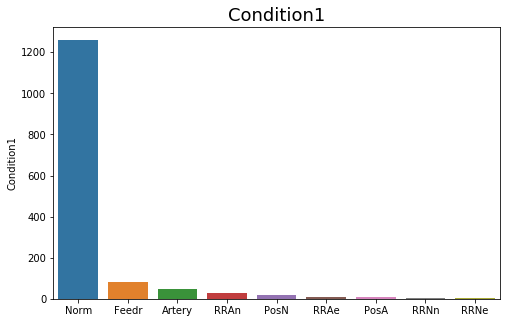

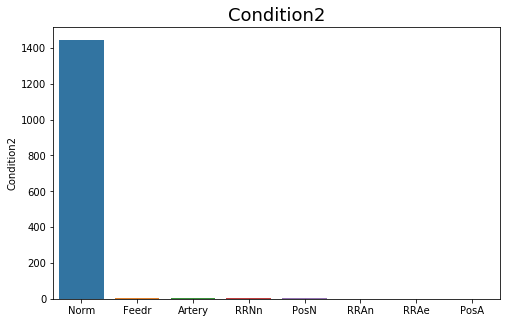

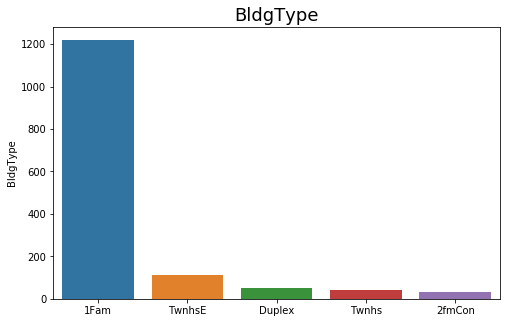

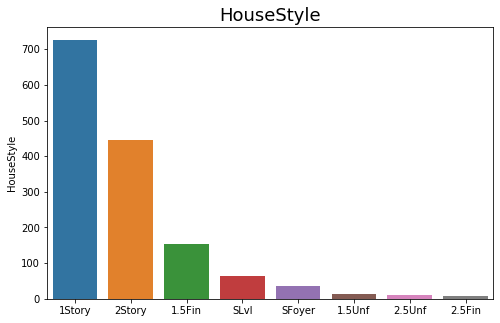

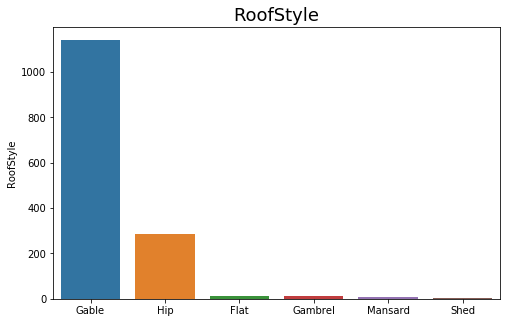

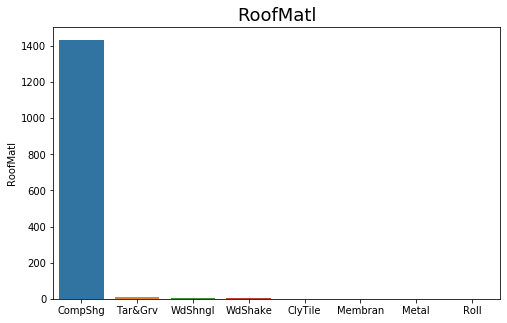

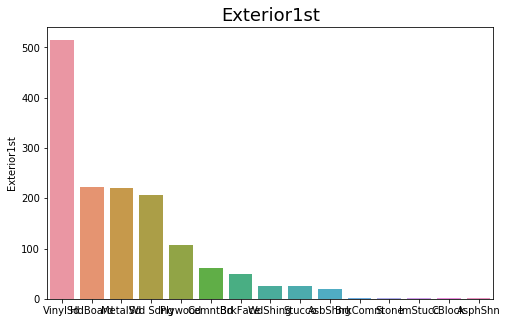

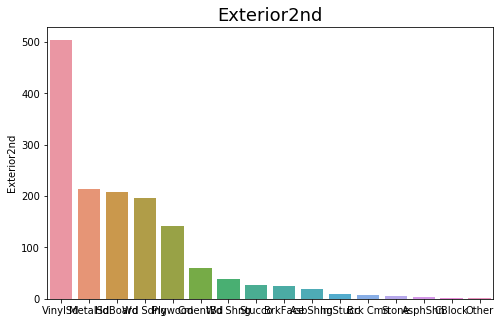

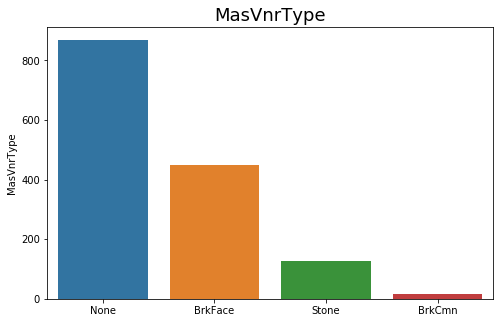

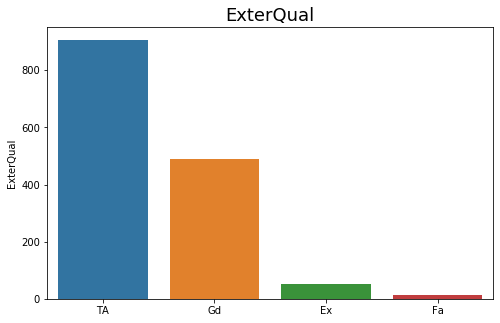

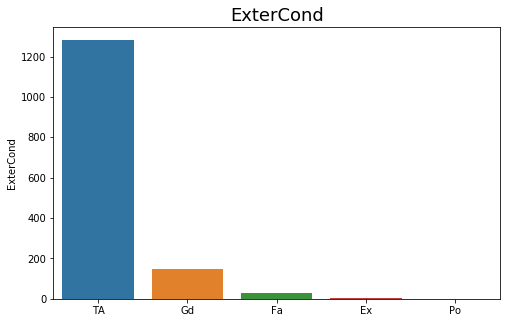

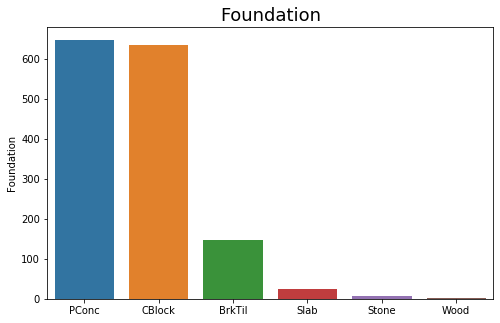

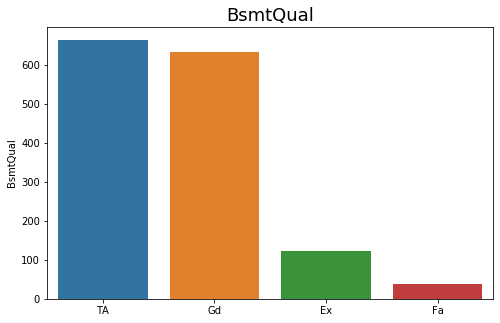

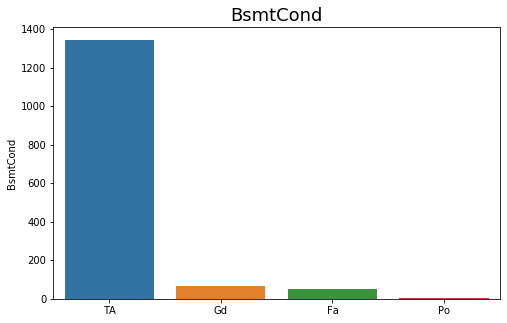

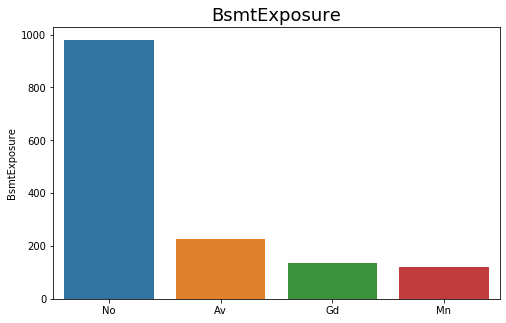

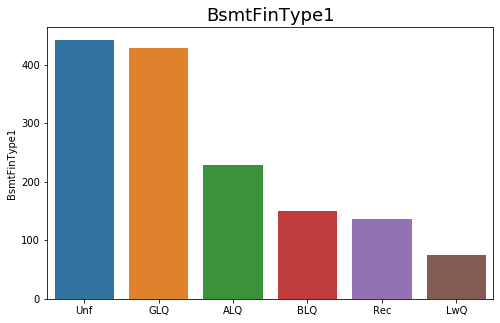

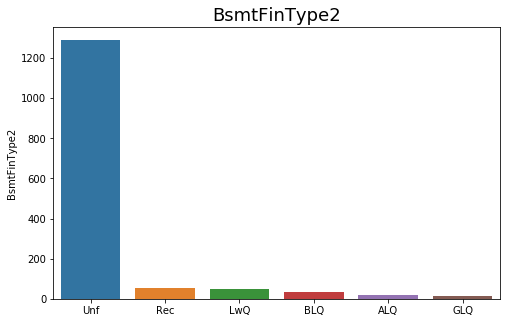

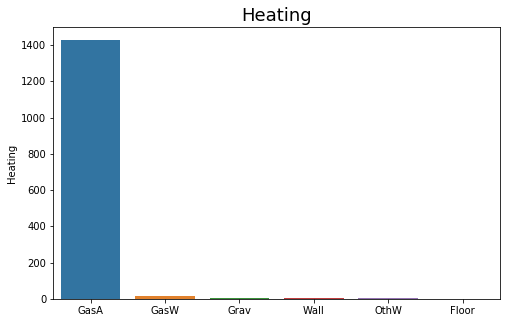

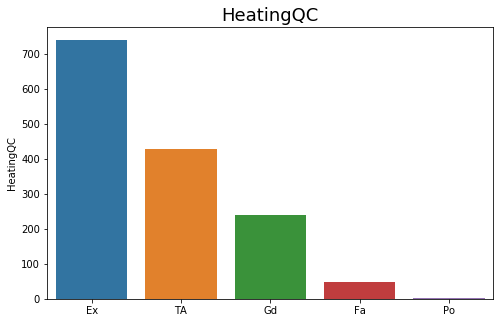

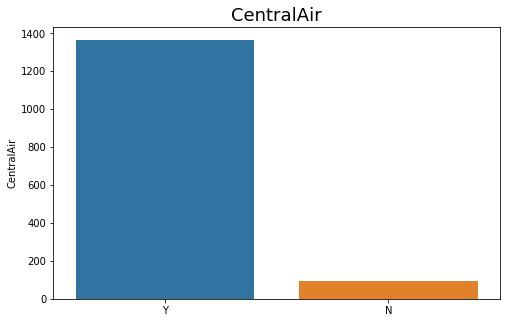

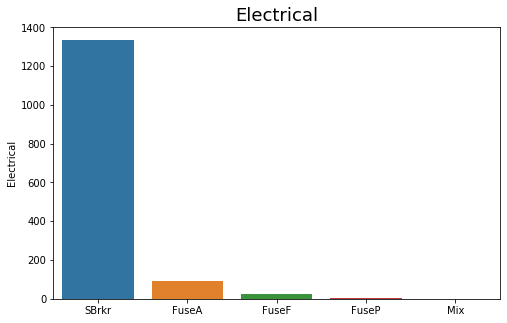

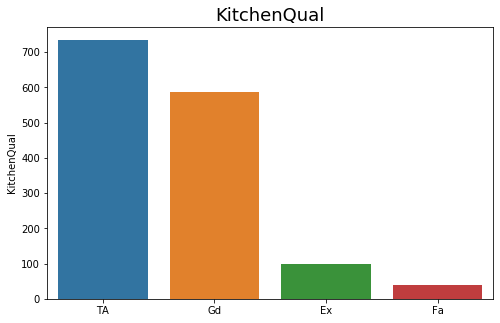

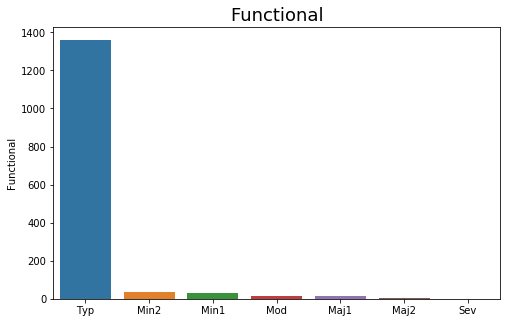

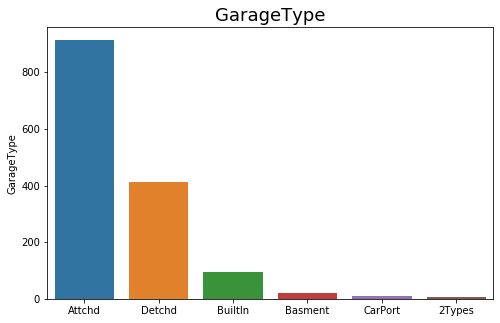

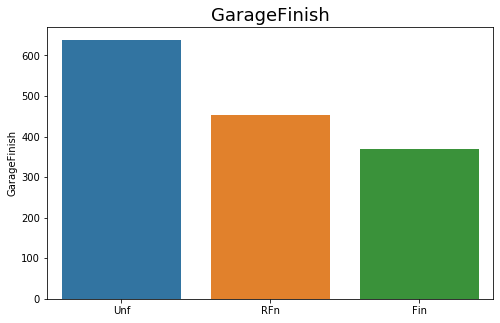

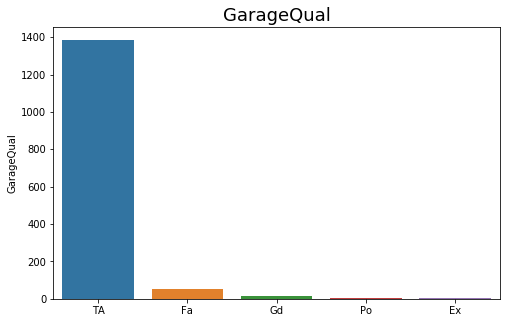

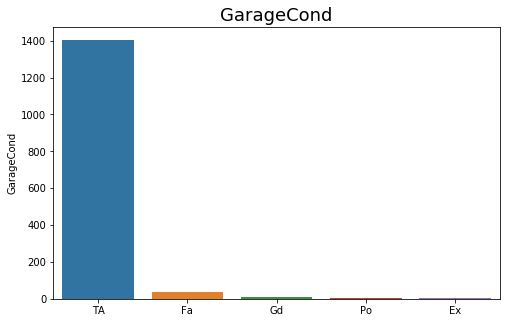

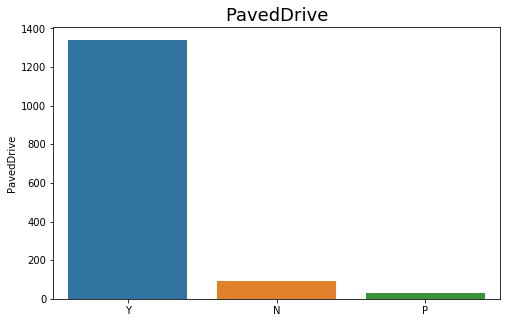

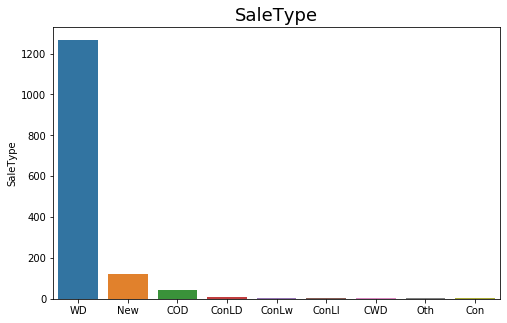

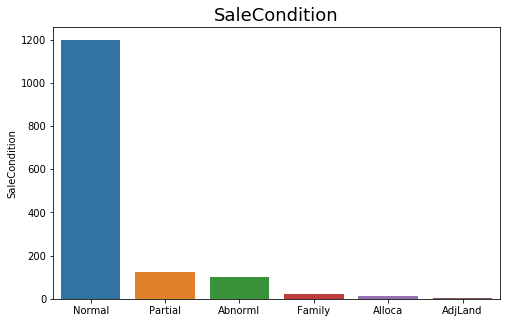

In [43]:
for col in cat_cols.columns:
    plt.figure(figsize=(8,5))
    plt.title(col, fontdict={'fontsize': 18})
    sns.barplot(cat_cols[col].value_counts().index, cat_cols[col].value_counts())
    plt.show()  

In [44]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [45]:
data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [46]:
data['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [47]:
data['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
RRAn         1
RRAe         1
PosA         1
Name: Condition2, dtype: int64

In [48]:
data['RoofMatl'].value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

In [49]:
data['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### From above analysis there are few columns whose data is biased towards a single value and very few records with other unique records. Since they will not show much variation we can drop those columns

In [50]:
drop_list=['Street','Utilities','LandSlope','Condition2','RoofMatl','Heating']

In [51]:
data=data.drop(drop_list,axis=1)

In [52]:
cat_cols=data.select_dtypes("object")

In [53]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal

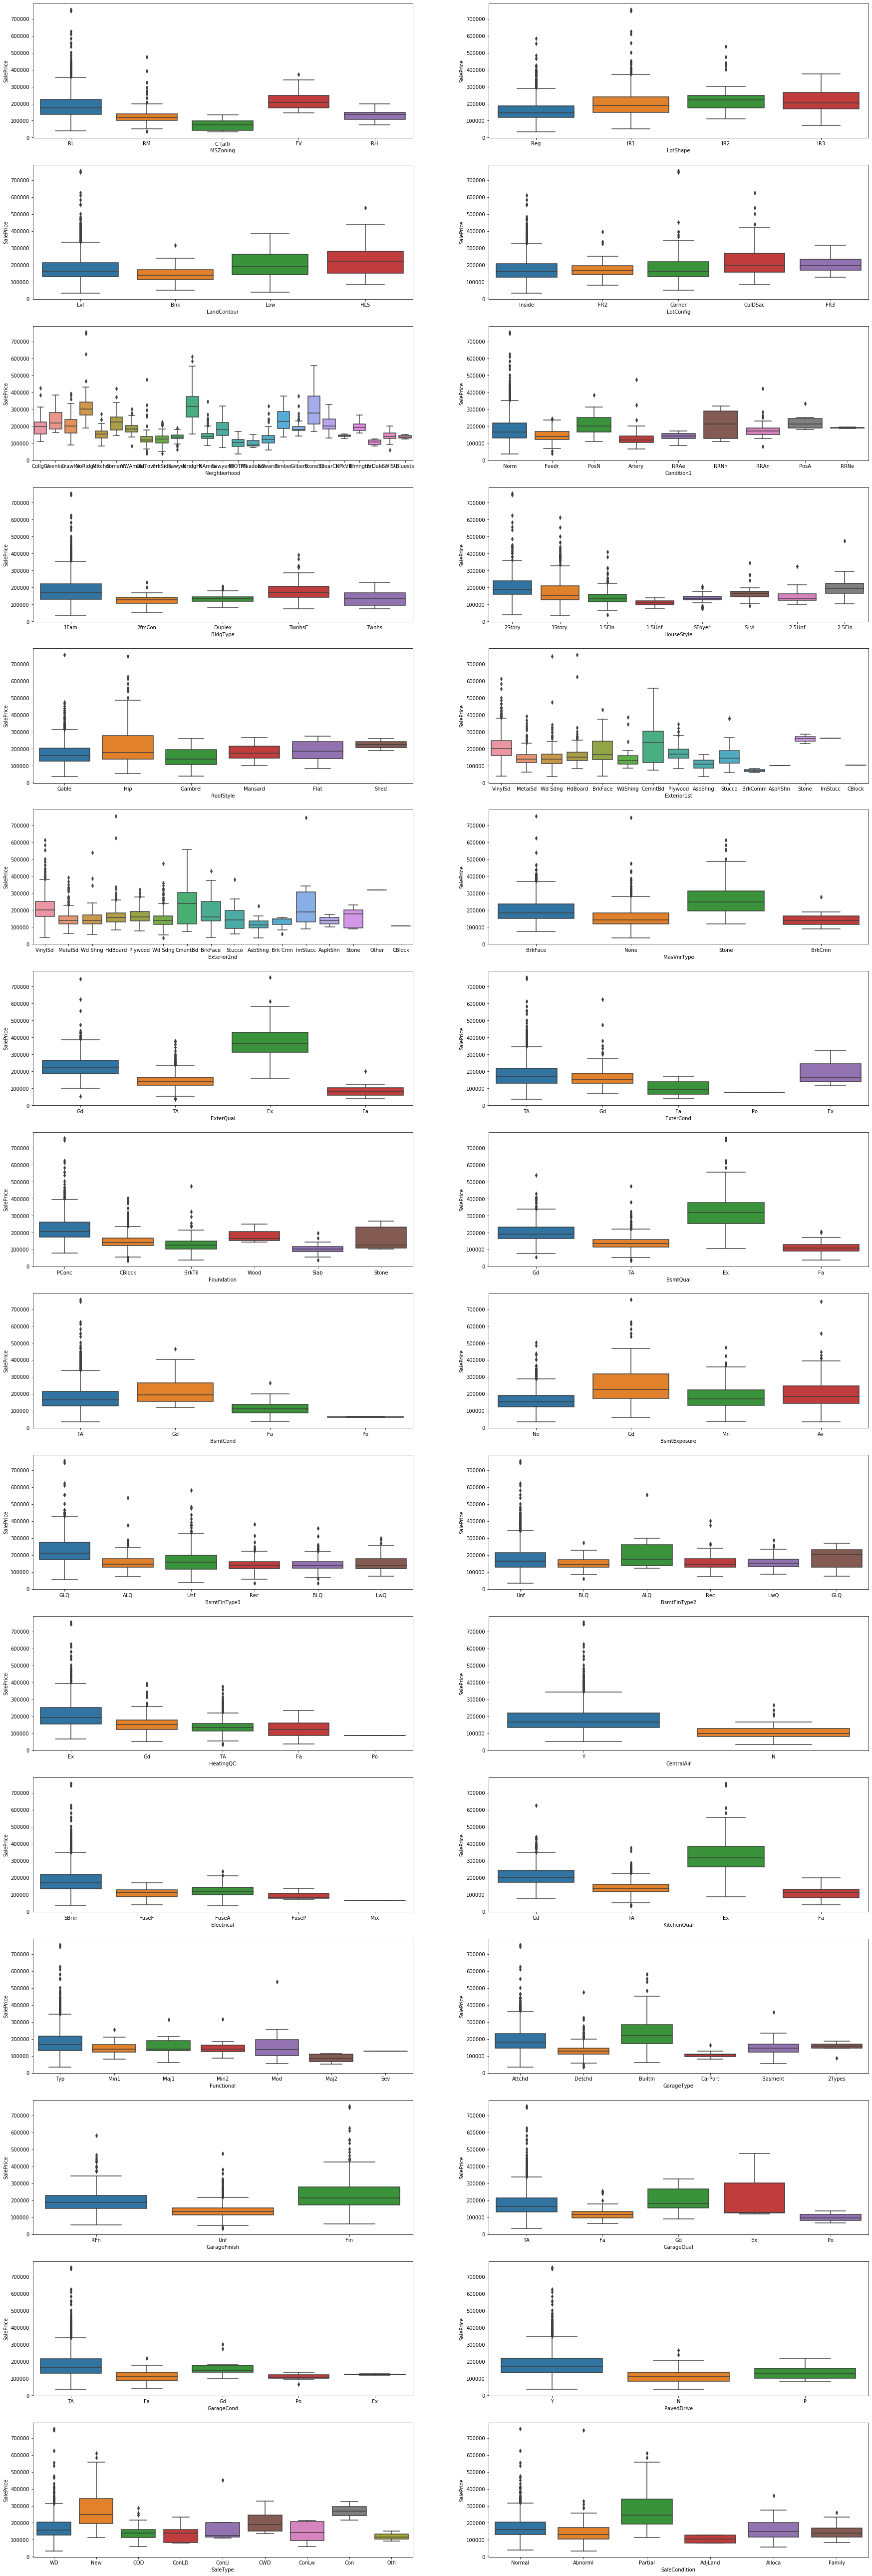

In [54]:
plt.figure(figsize=(30,100))
i=1
for col in cat_cols:
    plt.subplot(17,2,i)
    sns.boxplot(x=col,y=data['SalePrice'],data=data)
    i=i+1

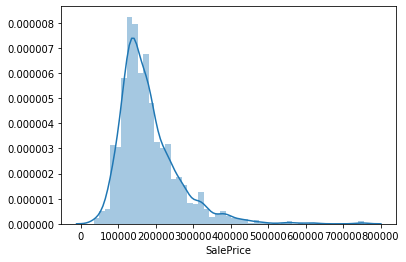

In [55]:
sns.distplot(data['SalePrice'])

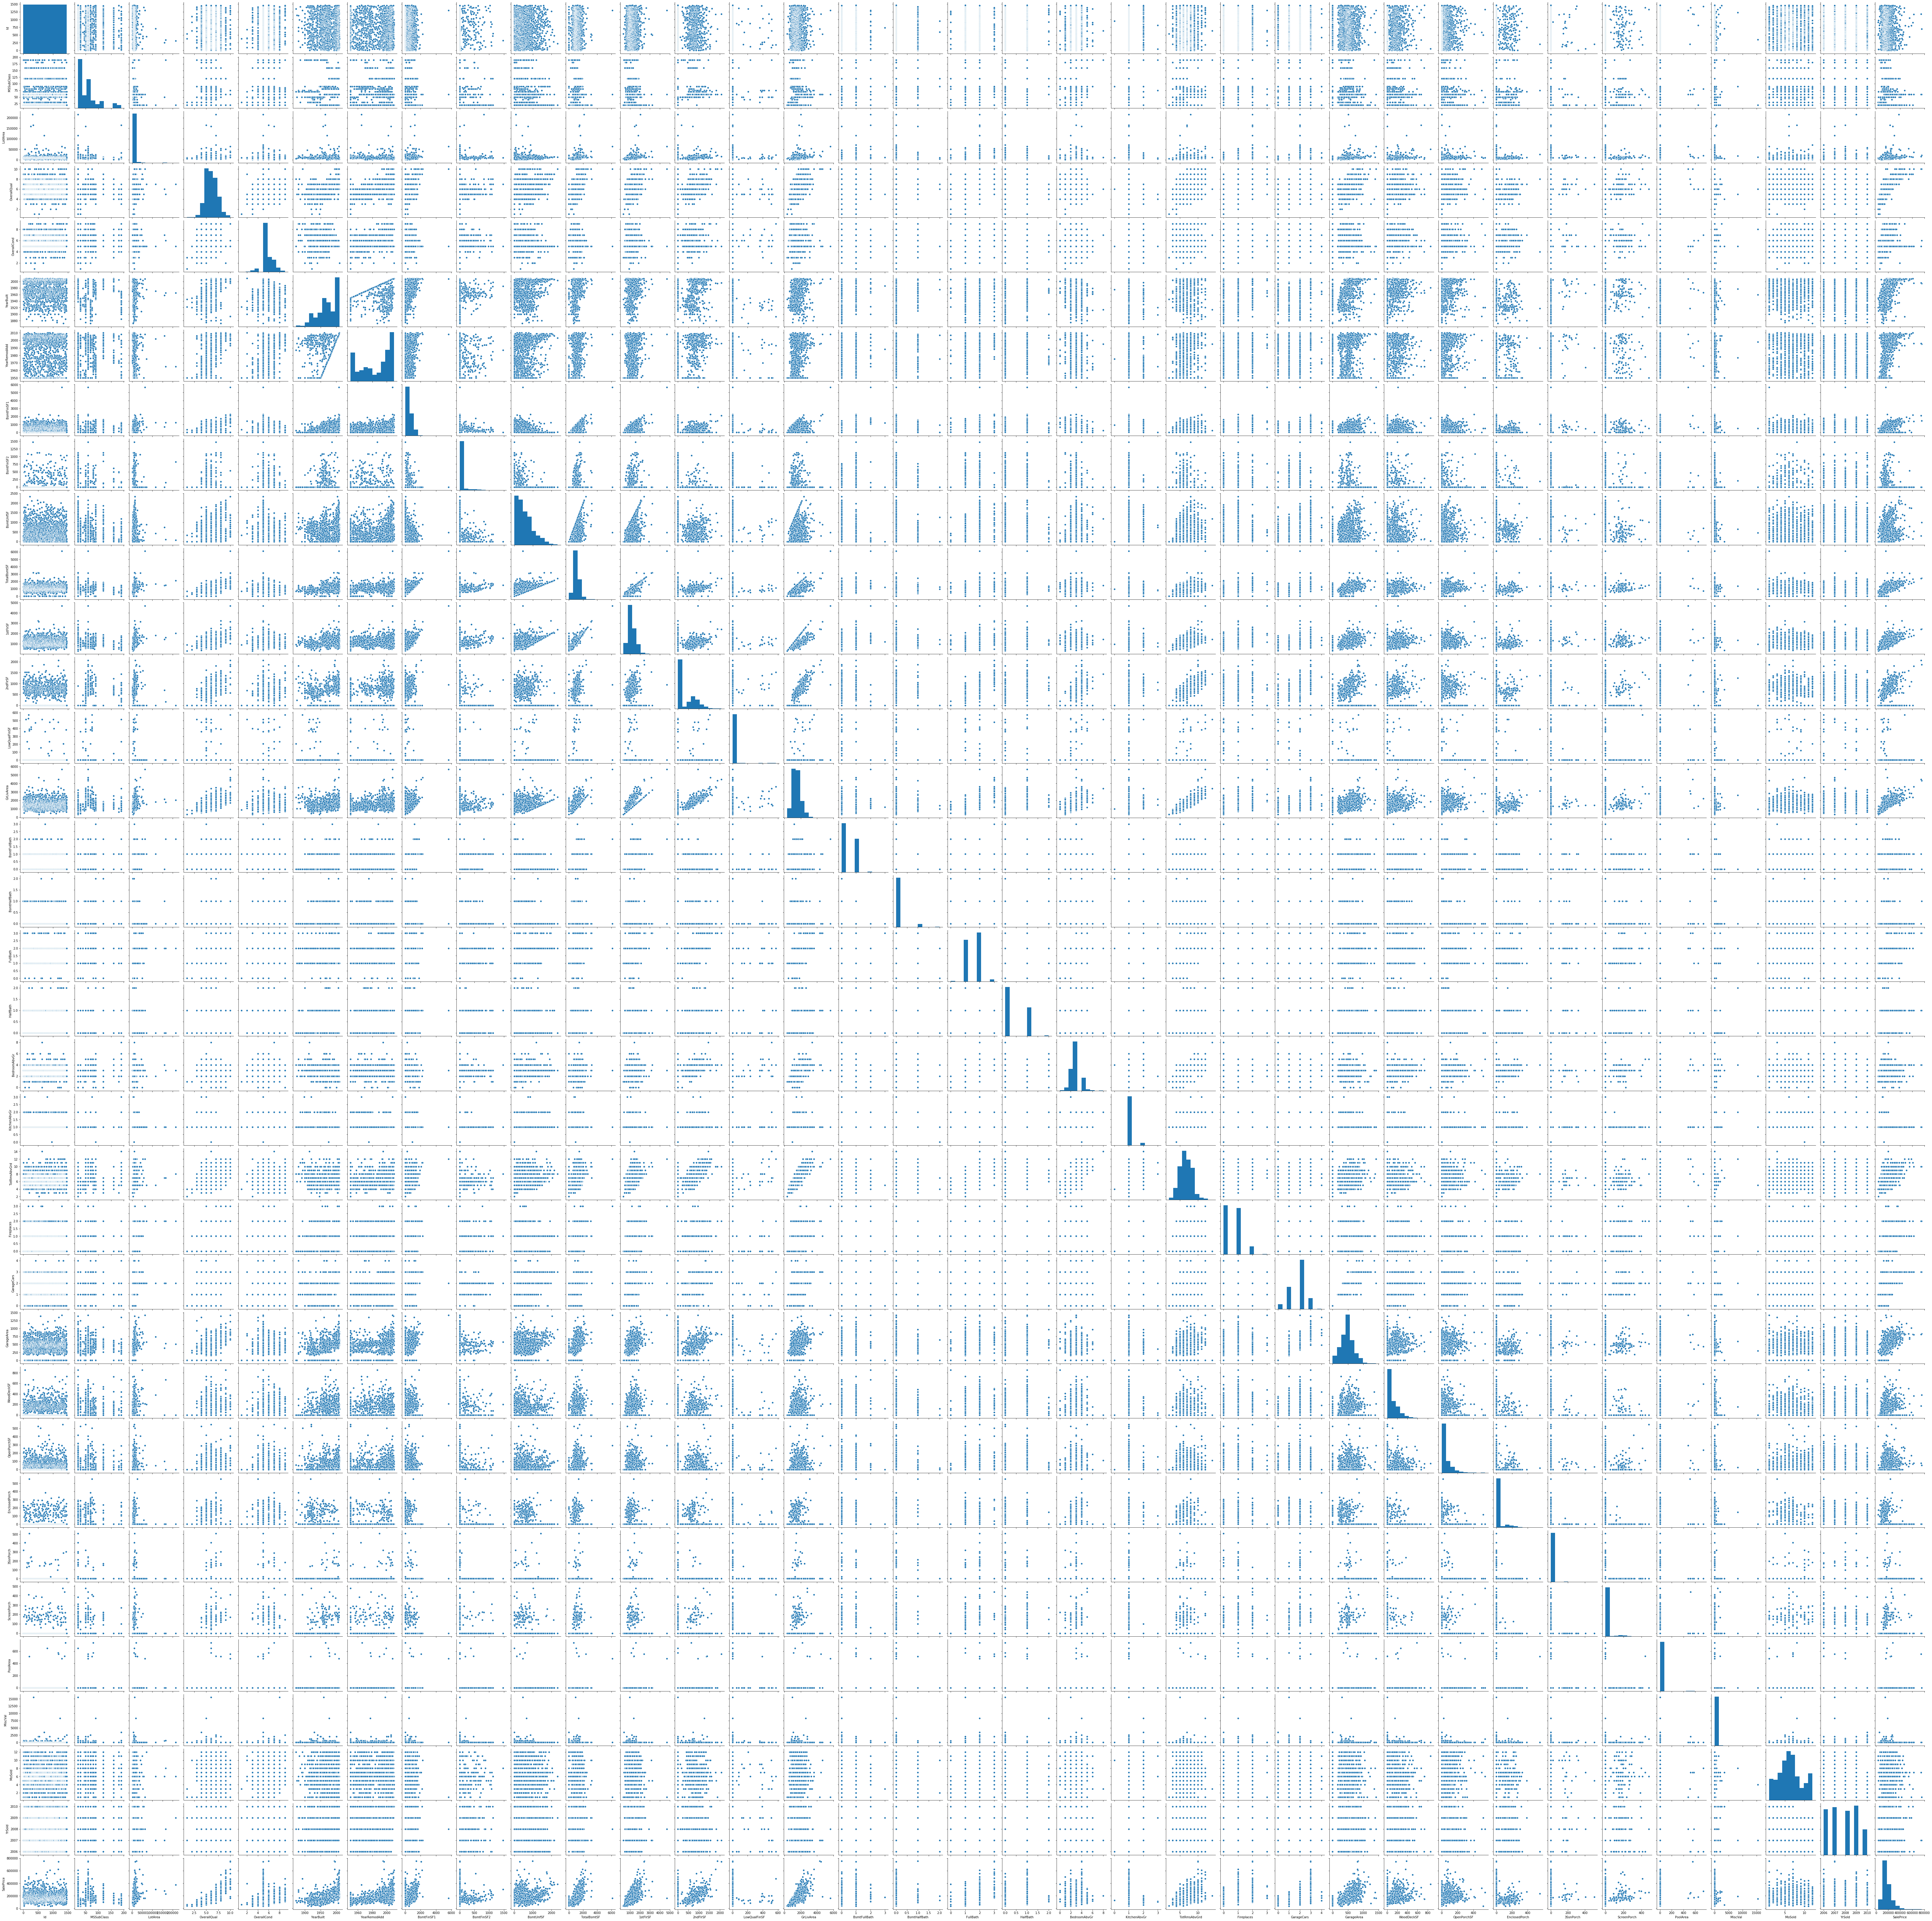

In [56]:
sns.pairplot(num_cols)

plt.figure(figsize=(100,100))
sns.heatmap(data.corr(),annot=True,annot_kws={'size': 50, 'rotation': 60})
plt.xticks(fontsize=50,rotation=90)
plt.yticks(fontsize=40,rotation=45)

From above heatmap we observe :
1. Our target variable "SalePrice" is strongly related with several attributes like OverallQual,1stFlrSF,2ndFlrSF,GrLivArea,GarageCars .
2. And variables 'GarageCars & GarageArea','1stFlrSF & TotalBsmtSF' are strongly correlated. Which helps us in understanding one of them can be used for our model.

In [58]:
data.drop(['GarageArea','1stFlrSF'],axis=1,inplace=True)

In [59]:
data.shape

(1460, 68)

In [60]:
cat_cols=data.select_dtypes("object")

In [61]:
cat_cols.shape[1]

32

In [62]:
cat_cols.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Data Preprocessing

To begin with categorical columns are split into two as nominal and ordinal variables. Nominal variables are treated with one hot encoding and ordinal variables are encoded with label encoding

In [63]:
# splitting categorical columns as nominal and ordinal, make it suitable for encoding
nominal_cols=['MSZoning','LotShape','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
'HouseStyle', 'RoofStyle', 'Exterior1st','Exterior2nd', 'MasVnrType','Foundation',
'BsmtExposure','CentralAir', 'Electrical',  'Functional','GarageType', 'GarageFinish','PavedDrive','SaleType', 'SaleCondition'
]
ordinal_cols=['ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','GarageQual', 'GarageCond']

In [64]:
label_encoder=LabelEncoder()

In [65]:
for col in ordinal_cols:
    data[col]=label_encoder.fit_transform(data[col])

In [66]:
## one hot encoding for nominal variables
data=pd.get_dummies(data=data,columns=nominal_cols,drop_first=True)

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 181 entries, Id to SaleCondition_Partial
dtypes: float64(3), int32(10), int64(33), uint8(135)
memory usage: 660.3 KB


In [68]:
data.drop(ordinal_cols,axis=1,inplace=True)
data.drop(['Id'],axis=1,inplace=True)

In [69]:
yr_cols=['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt']
for col in yr_cols:
    data[col]=label_encoder.fit_transform(data[col])

In [70]:
#data.drop(nominal_cols,axis=1,inplace=True)
data.drop(yr_cols,axis=1,inplace=True)

In [71]:
data.select_dtypes("float64").describe()

LotFrontage   MasVnrArea
count  1460.000000  1460.000000
mean     70.049958   103.117123
std      22.024023   180.731373
min      21.000000     0.000000
25%      60.000000     0.000000
50%      70.049958     0.000000
75%      79.000000   164.250000
max     313.000000  1600.000000

In [72]:
data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
0         706           0        150          856  ...               0   
1         978           0        284         1262  ...               0   
2         486           0        434          920  ...               0   
3         216           0        540          756  ...               0   
4         655           0        490         1145  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 166 columns]

### Datasets for model building

In [73]:
data_train,data_test= train_test_split(data,train_size=0.7,test_size=0.3,random_state=80)
data_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
183          50         63.0    11426            7            5         0.0   
506          60         80.0     9554            8            5       125.0   
87          160         40.0     3951            6            5        76.0   
932          20         84.0    11670            9            5       302.0   
17           90         72.0    10791            4            5         0.0   

     BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  SaleType_ConLI  \
183           0           0       1362         1362  ...               0   
506         380           0        397          777  ...               0   
87            0           0        612          612  ...               0   
932           0           0       1905         1905  ...               0   
17            0           0          0            0  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
183               0             0             0            1   
506               0             0             0            1   
87                0             1             0            0   
932               0             0             0            1   
17                0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
183                      0                     0                     0   
506                      0                     0                     0   
87                       0                     0                     0   
932                      0                     0                     0   
17                       0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
183                     1                      0  
506                     1                      0  
87                      0                      1  
932                     1                      0  
17                      1                      0  

[5 rows x 166 columns]

In [74]:
print("Train set size:",data_train.shape)
print("Test set size:",data_test.shape)

Train set size: (1021, 166)
Test set size: (438, 166)


In [75]:
# Rescaling using MinMaxscaler
scaler=MinMaxScaler(feature_range=(0, 1))

In [76]:
con_cols=['LotFrontage','MasVnrArea']

In [77]:
data_train[con_cols] = scaler.fit_transform(data_train[con_cols])
data_test[con_cols]=scaler.transform(data_test[con_cols])

In [78]:
data_train.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000    1021.000000  1021.000000  1021.000000   
mean     58.790402     0.166870   10167.937316     6.102840     5.581783   
std      43.953866     0.079815    6864.272554     1.375629     1.113386   
min      20.000000     0.000000    1477.000000     1.000000     1.000000   
25%      20.000000     0.133562    7259.000000     5.000000     5.000000   
50%      50.000000     0.167979    9353.000000     6.000000     5.000000   
75%      70.000000     0.195205   11500.000000     7.000000     6.000000   
max     190.000000     1.000000  115149.000000    10.000000     9.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000  ...   
mean      0.072295   446.609207    44.651322   564.013712  1055.274241  ...   
std       0.125866   465.861089   161.707167   441.002274   443.642436  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000   212.000000   798.000000  ...   
50%       0.000000   388.000000     0.000000   468.000000   990.000000  ...   
75%       0.117562   712.000000     0.000000   816.000000  1284.000000  ...   
max       1.000000  5644.000000  1474.000000  2153.000000  6110.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1021.000000     1021.000000   1021.000000   1021.000000   
mean         0.004897        0.003918      0.082272      0.002938   
std          0.069842        0.062500      0.274914      0.054153   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1021.000000            1021.000000           1021.000000   
mean      0.863859               0.002938              0.007835   
std       0.343106               0.054153              0.088214   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.017630              0.814887               0.085211  
std                0.131666              0.388579               0.279332  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 166 columns]

### Model Building

#### Data split

In [79]:
y_train = data_train.pop('SalePrice')
y_test = data_test.pop('SalePrice')


In [80]:
X_train = data_train
X_test=data_test

#### Linear model before RFE

In [81]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8787246670722029
0.8335035377660551
822509710045.367
403624883784.4414
805592272.3265102
921517999.5078571


### Linear model with RFE

In [83]:
rfe = RFE(lm, 90)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [84]:
#Find the top features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 54),
 ('LotFrontage', False, 55),
 ('LotArea', False, 72),
 ('OverallQual', True, 1),
 ('OverallCond', False, 12),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', False, 66),
 ('BsmtFinSF2', False, 67),
 ('BsmtUnfSF', False, 69),
 ('TotalBsmtSF', False, 70),
 ('2ndFlrSF', False, 62),
 ('LowQualFinSF', False, 65),
 ('GrLivArea', False, 58),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', True, 1),
 ('FullBath', True, 1),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 64),
 ('OpenPorchSF', False, 68),
 ('EnclosedPorch', False, 63),
 ('3SsnPorch', False, 61),
 ('ScreenPorch', False, 56),
 ('PoolArea', False, 59),
 ('MiscVal', False, 71),
 ('MoSold', False, 46),
 ('MSZoning_FV', False, 19),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 13),
 ('LotShape_IR3', True, 1),
 ('LotShape_Re

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR3', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SWISU',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Condition1_Norm',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'R

In [86]:
X_train_rfe=X_train[col]
X_test_rfe=X_test[col]
print(X_train_rfe.shape)

(1021, 90)


In [87]:
lm2 = LinearRegression()
lm2.fit(X_train_rfe, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred_train = lm2.predict(X_train_rfe)
y_pred_test = lm2.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8526555498425432
0.8085899154936755
999314848700.1655
464021109382.37213
978760870.4213178
1059408925.53053


### Regularization

#### Starting with Ridge Regularisation

In [89]:
# Lets start with alpha is 0.001 and build a Ridge regression model
ridge = Ridge(alpha=0.001)
ridge.fit(X_train_rfe,y_train)

y_train_pred = ridge.predict(X_train_rfe)
print(r2_score(y_train,y_train_pred))

0.8526555370318816


In [90]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
  10.0, 20, 50, 100, 500 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [92]:
# retraing Ridge with updated alpha
ridge = Ridge(alpha=10)
ridge.fit(X_train_rfe,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [93]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8385028901602597
0.8531680476717945
1095300567564.9924
355953687538.66394
1072772348.2517066
812679651.9147578


#### Lasso

In [94]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 10.0, 20, 50,
                                   100, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [95]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [96]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised


lasso = Lasso(alpha=100)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.8417586978337622
0.8477299245646681
1073219132199.3159
369136921450.47656
1051145085.4057943
842778359.4759738


In [98]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }
lr2_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'RFE': metric2
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )
rfe_metric = pd.DataFrame(lr2_table ,columns = [ 'RFE'] )

rg_metric = pd.Series(metric3, name = 'Ridge Regression')
ls_metric = pd.Series(metric4, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rfe_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression           RFE  Ridge Regression  \
0  R2 Score (Train)       8.787247e-01  8.526555e-01      8.385029e-01   
1   R2 Score (Test)       8.335035e-01  8.085899e-01      8.531680e-01   
2       RSS (Train)       8.225097e+11  9.993148e+11      1.095301e+12   
3        RSS (Test)       4.036249e+11  4.640211e+11      3.559537e+11   
4       MSE (Train)       2.838296e+04  3.128515e+04      3.275320e+04   
5        MSE (Test)       3.035651e+04  3.254856e+04      2.850754e+04   

   Lasso Regression  
0      8.417587e-01  
1      8.477299e-01  
2      1.073219e+12  
3      3.691369e+11  
4      3.242137e+04  
5      2.903065e+04

### Changes in coefficients after Regularization

In [99]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [100]:
betas.rows = X_train_rfe.columns

In [101]:

betas['RFE']=lm2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [102]:
pd.set_option('display.max_rows', None)
betas.head(10)

RFE         Ridge         Lasso
OverallQual   15448.502869  18204.854819  16793.561934
MasVnrArea    66978.028104  34766.830539  56432.942871
BsmtFullBath  15710.497500  14833.814064  15140.308290
BsmtHalfBath   8929.853263   5793.909083   4443.919167
FullBath      24771.267106  19225.477716  20342.810344
HalfBath       9065.436294   8501.288719   7566.863818
BedroomAbvGr  -7714.363145  -6867.668204  -6630.977383
KitchenAbvGr -38061.671817 -29560.374479 -36190.878421
TotRmsAbvGrd  11055.479269  11731.245681  11528.397175
Fireplaces     9991.003952   9960.287143   9299.238693

### Subjective answers

##### Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

From observing different models the optimal values are as follows:
Ridge =10
Lasso = 100

In [103]:
# Let us observe what happens if we double the alpha 
ridge2 = Ridge(alpha=20)
ridge2.fit(X_train_rfe,y_train)

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [104]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

metric_r20 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_r20.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_r20.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_r20.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_r20.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_r20.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_r20.append(mse_test_lr**0.5)

0.8282455550618244
0.8543752302380937
1164867539792.3547
353027205399.0948
1140908462.0884962
805998185.8426821


In [105]:
lasso2 = Lasso(alpha=200)
        
lasso2.fit(X_train_rfe, y_train) 

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [106]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_rfe)

metric_l200 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_l200.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_l200.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_l200.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_l200.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_l200.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_l200.append(mse_test_lr**0.5)

0.8331704151017267
0.8504366630184006
1131466310493.3535
362575178461.0818
1108194231.6291416
827797211.0983603


In [107]:
#important predictor variables
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge2'] = ridge2.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas['Lasso20'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Ridge2         Ridge         Lasso       Lasso20
OverallQual           19598.278307  18204.854819  16793.561934  18139.761957
MasVnrArea            24496.445189  34766.830539  56432.942871  43075.850428
BsmtFullBath          14253.528329  14833.814064  15140.308290  14401.158303
BsmtHalfBath           4413.375100   5793.909083   4443.919167   1396.787843
FullBath              16873.568499  19225.477716  20342.810344  18627.235137
HalfBath               7734.727218   8501.288719   7566.863818   6558.365048
BedroomAbvGr          -6567.237901  -6867.668204  -6630.977383  -6321.352472
KitchenAbvGr         -24344.776529 -29560.374479 -36190.878421 -33778.603720
TotRmsAbvGrd          11738.892516  11731.245681  11528.397175  11339.147015
Fireplaces            10324.143032   9960.287143   9299.238693   9182.117309
GarageCars            12838.500630  12206.645415  11398.696185  12132.585100
MSZoning_RH            1989.978463   3841.748374      0.000000      0.000000
MSZoning_RL            7673.803517   8441.086709   7170.579887   8583.506644
MSZoning_RM           -4004.932560   -831.887127     -0.000000     -0.000000
LotShape_IR3          -8717.915789 -13025.170171 -16157.544745  -3118.444110
LandContour_HLS        5897.268692   8387.429610   5149.225642      0.000000
LandContour_Low        5458.930844   7940.703254   5246.519473      0.000000
LandContour_Lvl        6524.237685   8963.254252   6411.367653   1645.280536
LotConfig_CulDSac     15463.573828  16926.636159  16441.428038  14935.753014
LotConfig_FR2         -5989.962110  -7542.277691  -6555.050330  -4016.613381
LotConfig_FR3         -1342.991656  -2862.823300     -0.000000     -0.000000
Neighborhood_Blueste   -807.748465  -1354.085596     -0.000000     -0.000000
Neighborhood_BrDale   -3933.560814  -4876.667368     -0.000000     -0.000000
Neighborhood_Crawfor  10373.593054  13642.767847  17656.628828  14507.511151
Neighborhood_Edwards -10609.805829 -12106.030570 -11309.774858  -8928.212219
Neighborhood_Gilbert -15127.243450 -16720.849085 -13483.443273 -10973.841493
Neighborhood_IDOTRR   -4943.837786  -7876.150152  -9640.493760  -2807.236619
Neighborhood_Mitchel  -6318.355883  -7494.791249  -4023.466181     -0.000000
Neighborhood_NAmes    -5096.105180  -5827.217091  -3646.175491   -891.425467
Neighborhood_NWAmes   -9631.201222 -11637.740111  -9048.392653  -4755.921458
Neighborhood_NoRidge  38575.721267  49852.983339  68305.873443  67665.969578
Neighborhood_NridgHt  25865.490673  32606.918056  42537.146049  40014.538761
Neighborhood_SWISU    -7126.331327  -9471.920071  -9978.880955  -4839.573593
Neighborhood_Somerst   8090.050508  12173.798610  17527.845922  15504.214830
Neighborhood_StoneBr  18691.003091  26994.703999  43308.552204  37485.141634
Condition1_Norm       10301.202253  10886.442589  10848.262976   9705.834441
Condition1_PosN       -4614.650944  -6462.210647  -2119.818976     -0.000000
Condition1_RRAe       -4324.363522  -6564.297398  -1037.347746     -0.000000
Condition1_RRAn        3907.572327   6396.292634   4550.819827      0.000000
BldgType_Twnhs       -14674.604627 -19830.683432 -26887.842521 -20855.748816
BldgType_TwnhsE      -16464.024499 -20329.328622 -22937.034177 -18514.562437
HouseStyle_2.5Fin       279.869894   1294.625088      0.000000      0.000000
HouseStyle_2.5Unf     -6167.545072  -8646.555204   -564.232529     -0.000000
HouseStyle_2Story     -5370.425739  -6707.707311  -6425.477197  -4217.261684
HouseStyle_SFoyer     -8262.534026 -11701.209359 -11236.132623  -4152.686041
HouseStyle_SLvl      -10586.046943 -13182.570843 -12445.667662  -8232.935149
RoofStyle_Gambrel      2874.553406   5240.468687      0.000000      0.000000
RoofStyle_Hip          8730.357292   8624.841311   6804.338160   6646.532730
RoofStyle_Mansard       800.266434   1904.221983      0.000000      0.000000
RoofStyle_Shed         1619.515447   3197.524568      0.000000      0.000000
Exterior1st_AsphShn    -571.131140   -873.887297     -0.000000     -0.000000
Exterior1st_BrkFace   11

Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [108]:
# recreate datasets excluding top 5 features
X_train_l2=X_train_rfe.drop(['OverallQual','MasVnrArea', 'BsmtFullBath','BsmtHalfBath','FullBath'],axis=1)
X_test_l2=X_test_rfe.drop(['OverallQual','MasVnrArea', 'BsmtFullBath','BsmtHalfBath','FullBath'],axis=1)

In [109]:
type(X_train_l2)

pandas.core.frame.DataFrame

In [110]:
lasso3 = Lasso(alpha=100)
        
lasso3.fit(X_train_l2, y_train) 

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [111]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso3.predict(X_train_l2)
y_pred_test = lasso3.predict(X_test_l2)

metric_l3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric_l3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric_l3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric_l3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric_l3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric_l3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric_l3.append(mse_test_lr**0.5)

0.7963470161005396
0.7830595956334824
1381208797313.6812
525912348681.32446
1352799997.3689334
1200713124.8432066


In [112]:
betas = pd.DataFrame(index=X_train_l2.columns)
betas.rows = X_train_l2.columns

betas['Lasso3'] = lasso3.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

Lasso3
HalfBath               6318.568743
BedroomAbvGr          -6768.282209
KitchenAbvGr         -42687.324302
TotRmsAbvGrd          17693.720448
Fireplaces            16087.355180
GarageCars            19113.791239
MSZoning_RH            1928.152007
MSZoning_RL           12097.751363
MSZoning_RM              -0.000000
LotShape_IR3             -0.000000
LandContour_HLS       12653.664456
LandContour_Low           0.000000
LandContour_Lvl       13385.489128
LotConfig_CulDSac     17054.190720
LotConfig_FR2         -8426.788169
LotConfig_FR3            -0.000000
Neighborhood_Blueste      0.000000
Neighborhood_BrDale      -0.000000
Neighborhood_Crawfor  15656.751992
Neighborhood_Edwards -19414.112557
Neighborhood_Gilbert -14468.452393
Neighborhood_IDOTRR  -18758.303720
Neighborhood_Mitchel  -2117.326921
Neighborhood_NAmes   -10971.267807
Neighborhood_NWAmes    -253.433693
Neighborhood_NoRidge  97371.204098
Neighborhood_NridgHt  60898.910012
Neighborhood_SWISU    -9475.289106
Neighborhood_Somerst  38040.136474
Neighborhood_StoneBr  73502.704764
Condition1_Norm        9733.895455
Condition1_PosN          -0.000000
Condition1_RRAe       -1882.428307
Condition1_RRAn           0.000000
BldgType_Twnhs       -16380.244828
BldgType_TwnhsE      -14339.201033
HouseStyle_2.5Fin         0.000000
HouseStyle_2.5Unf        -0.000000
HouseStyle_2Story     -4077.004126
HouseStyle_SFoyer    -10555.636612
HouseStyle_SLvl      -13857.979886
RoofStyle_Gambrel        -0.000000
RoofStyle_Hip         11955.886221
RoofStyle_Mansard         0.000000
RoofStyle_Shed            0.000000
Exterior1st_AsphShn       0.000000
Exterior1st_BrkFace   18775.821012
Exterior1st_CemntBd   10488.907011
Exterior1st_ImStucc      -0.000000
Exterior1st_Stone         0.000000
Exterior1st_VinylSd       0.000000
Exterior1st_Wd Sdng   -5932.070150
Exterior2nd_Brk Cmn      -0.000000
Exterior2nd_CmentBd       0.000000
Exterior2nd_ImStucc   13430.845505
Exterior2nd_Stone     -8902.105747
Exterior2nd_Stucco    -8061.127559
Exterior2nd_VinylSd    2168.394713
Exterior2nd_Wd Sdng    5185.676851
Exterior2nd_Wd Shng   -5638.024354
MasVnrType_None       -1958.270815
Foundation_CBlock      2255.704863
Foundation_PConc      16079.401453
Foundation_Stone          0.000000
Foundation_Wood           0.000000
BsmtExposure_Gd       31208.418533
BsmtExposure_Mn      -14018.965941
BsmtExposure_No      -19387.449803